# Load pre-trained word vectors, store them in a vector index and lookup similar words. Visualize similar words too.

We will download pre-trained word vectors from https://fasttext.cc/docs/en/english-vectors.html


In [1]:
# wget is a terminal command to download a file. 
# You can run terminal commands in Python notebook by prefixing with a "!

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2024-06-23 13:38:11--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.128, 13.35.7.38, 13.35.7.82, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: 'wiki-news-300d-1M.vec.zip'

wiki-news-300d-1M.v 100%[===================>] 650.22M   147MB/s    in 4.7s    

2024-06-23 13:38:15 (137 MB/s) - 'wiki-news-300d-1M.vec.zip' saved [681808098/681808098]



In [2]:
!unzip /kaggle/working/wiki-news-300d-1M.vec.zip

Archive:  /kaggle/working/wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [3]:
# head is a terminal command to show you a few lines of the file.
!head /kaggle/working/wiki-news-300d-1M.vec

999994 300
, 0.1073 0.0089 0.0006 0.0055 -0.0646 -0.0600 0.0450 -0.0133 -0.0357 0.0430 -0.0356 -0.0032 0.0073 -0.0001 0.0258 -0.0166 0.0075 0.0686 0.0392 0.0753 0.0115 -0.0087 0.0421 0.0265 -0.0601 0.2420 0.0199 -0.0739 -0.0031 -0.0263 -0.0062 0.0168 -0.0357 -0.0249 0.0190 -0.0184 -0.0537 0.1420 0.0600 0.0226 -0.0038 -0.0675 -0.0036 -0.0080 0.0570 0.0208 0.0223 -0.0256 -0.0153 0.0022 -0.0482 0.0131 -0.6016 -0.0088 0.0106 0.0229 0.0336 0.0071 0.0887 0.0237 -0.0290 -0.0405 -0.0125 0.0147 0.0475 0.0647 0.0474 0.0199 0.0408 0.0322 0.0036 0.0350 -0.0723 -0.0305 0.0184 -0.0026 0.0240 -0.0160 -0.0308 0.0434 0.0147 -0.0457 -0.0267 -0.1703 -0.0099 0.0417 0.0235 -0.0260 -0.1519 -0.0116 -0.0306 -0.0413 0.0330 0.0723 0.0365 -0.0001 0.0042 0.0346 0.0277 -0.0305 0.0784 -0.0404 0.0187 -0.0225 -0.0206 -0.0179 -0.2428 0.0669 0.0523 0.0527 0.0149 -0.0708 -0.0987 0.0263 -0.0611 0.0302 0.0216 0.0313 -0.0140 -0.2495 -0.0346 -0.0480 0.0250 0.2130 -0.0330 -0.1553 -0.0292 -0.0346 0.1074 0.0010 -0.0117 -0.0057

In [4]:
# Importing the necessary module to work with files
import os

# Defining the path to the file we want to read
file_path = '/kaggle/working/wiki-news-300d-1M.vec'

# Using a 'try-except' block to handle any errors that may occur while opening the file
try:
    # Opening the file in read mode ('r')
    # The 'with' statement ensures the file is properly closed after its containing code block
    # finishes. 'with' is an example of a context manager.
    with open(file_path, 'r', encoding='utf-8') as file:
        # Reading the first line of the file which contains 
        # metadata (like number of words and dimensions)
        first_line = file.readline()
        
        # Printing the first line to understand the metadata information
        print("First line (metadata):", first_line)
        
        # Initializing an empty list to store the word vectors
        word_vectors = dict()
        
        # Looping through each subsequent line in the file
        for line in file:
            # Splitting the line into word and vector components using whitespace as delimiter
            # split() can use a custom delimiter but if you don't specify one, it defaults to space.
            parts = line.strip().split()
            
            # Extracting the word from the first part of the line
            word = parts[0]
            
            # Extracting the vector values from the remaining parts and converting them to floats
            # The firt item is the word and the rest of the items are the values of the vector embedding.
            # parts[1:] is a list from the second item to the last item (list index start at 0 for the first item)
            # float is being applied to each item in the list. This is being done using map.
            # map takes a function and a list and applies that function to each item in the input list.
            # list just converts the result back to a list type.
            embedding_vector = list(map(float, parts[1:]))
        
            # Appending a tuple of word and its corresponding vector to the word_vectors list
            word_vectors[word] = embedding_vector

    # Printing a message to indicate that the file has been read successfully
    print("File read successfully and word vectors stored in the dictionary.")
    # Optionally, you can print a few word vectors to see what they look like
    for word, vector in list(word_vectors.items())[:5]:  # Displaying only the first 5 for brevity
        print(f"Word: {word}, Vector: {vector}")

except Exception as e:
    # Printing any error that occurs during the file reading process
    print(f"An error occurred: {e}")

First line (metadata): 999994 300

File read successfully and word vectors stored in the dictionary.
Word: ,, Vector: [0.1073, 0.0089, 0.0006, 0.0055, -0.0646, -0.06, 0.045, -0.0133, -0.0357, 0.043, -0.0356, -0.0032, 0.0073, -0.0001, 0.0258, -0.0166, 0.0075, 0.0686, 0.0392, 0.0753, 0.0115, -0.0087, 0.0421, 0.0265, -0.0601, 0.242, 0.0199, -0.0739, -0.0031, -0.0263, -0.0062, 0.0168, -0.0357, -0.0249, 0.019, -0.0184, -0.0537, 0.142, 0.06, 0.0226, -0.0038, -0.0675, -0.0036, -0.008, 0.057, 0.0208, 0.0223, -0.0256, -0.0153, 0.0022, -0.0482, 0.0131, -0.6016, -0.0088, 0.0106, 0.0229, 0.0336, 0.0071, 0.0887, 0.0237, -0.029, -0.0405, -0.0125, 0.0147, 0.0475, 0.0647, 0.0474, 0.0199, 0.0408, 0.0322, 0.0036, 0.035, -0.0723, -0.0305, 0.0184, -0.0026, 0.024, -0.016, -0.0308, 0.0434, 0.0147, -0.0457, -0.0267, -0.1703, -0.0099, 0.0417, 0.0235, -0.026, -0.1519, -0.0116, -0.0306, -0.0413, 0.033, 0.0723, 0.0365, -0.0001, 0.0042, 0.0346, 0.0277, -0.0305, 0.0784, -0.0404, 0.0187, -0.0225, -0.0206, -0.0179, 

In [5]:
# word vector of some words like college, university
word_vectors['college']

[-0.1006,
 -0.1081,
 0.086,
 -0.0913,
 -0.0335,
 0.0238,
 0.0102,
 -0.0019,
 -0.0199,
 0.1191,
 -0.236,
 -0.1108,
 -0.004,
 -0.0754,
 -0.1965,
 0.063,
 -0.1241,
 -0.1043,
 0.0706,
 -0.0958,
 -0.1889,
 -0.1089,
 -0.01,
 0.2148,
 0.071,
 -0.1083,
 0.1288,
 0.1171,
 -0.0094,
 -0.0714,
 0.0245,
 0.0174,
 0.0581,
 -0.056,
 0.0757,
 -0.0383,
 0.0349,
 0.1114,
 0.071,
 0.0488,
 -0.0199,
 0.0101,
 -0.1571,
 -0.113,
 0.0247,
 0.0678,
 -0.0151,
 -0.0411,
 0.0131,
 0.0621,
 0.0017,
 0.071,
 -0.6615,
 0.0794,
 0.0821,
 0.0467,
 -0.1827,
 0.0762,
 0.087,
 -0.0872,
 -0.0828,
 0.0642,
 -0.1064,
 -0.0833,
 -0.0191,
 0.1168,
 0.1224,
 0.011,
 0.337,
 0.0169,
 -0.0387,
 -0.031,
 0.0649,
 -0.0304,
 0.0168,
 0.2116,
 0.0061,
 0.0527,
 0.1095,
 0.0582,
 -0.0816,
 -0.0253,
 -0.1148,
 -0.1856,
 -0.0869,
 -0.1536,
 0.0203,
 -0.0487,
 0.2598,
 0.0551,
 -0.1285,
 0.0121,
 -0.1673,
 -0.1057,
 -0.113,
 -0.0575,
 0.0115,
 0.1028,
 -0.052,
 0.0801,
 -0.1989,
 0.026,
 -0.0497,
 0.0534,
 0.1095,
 0.0678,
 0.0582,
 0.

In [7]:
# Estimate cosine similarity between a few words
import numpy as np
from numpy.linalg import norm
 
# define two lists or array
w1 = np.array(word_vectors['college'])
w2 = np.array(word_vectors['university'])
w3 = np.array(word_vectors['office'])
 
 
# compute cosine similarity
w1_w2_cosine = np.dot(w1,w2)/(norm(w1)*norm(w2))
print("Cosine Similarity between college and university:", w1_w2_cosine)

# compute cosine similarity
w1_w3_cosine = np.dot(w1,w3)/(norm(w1)*norm(w3))
print("Cosine Similarity between college and office:", w1_w3_cosine)

Cosine Similarity between college and university: 0.7941901894056824
Cosine Similarity between college and office: 0.49781446402087


In [9]:
# find the top 10 similar words to the word "college"

# First store the cosine similarity between the vector for the word "college" to 
# all the other vectors.
similarity_vals = dict()
query_vec = word_vectors['college']

for word, vector in word_vectors.items():
   similarity_vals[word] =  np.dot(query_vec, vector)/(norm(query_vec)*norm(vector))
    
    

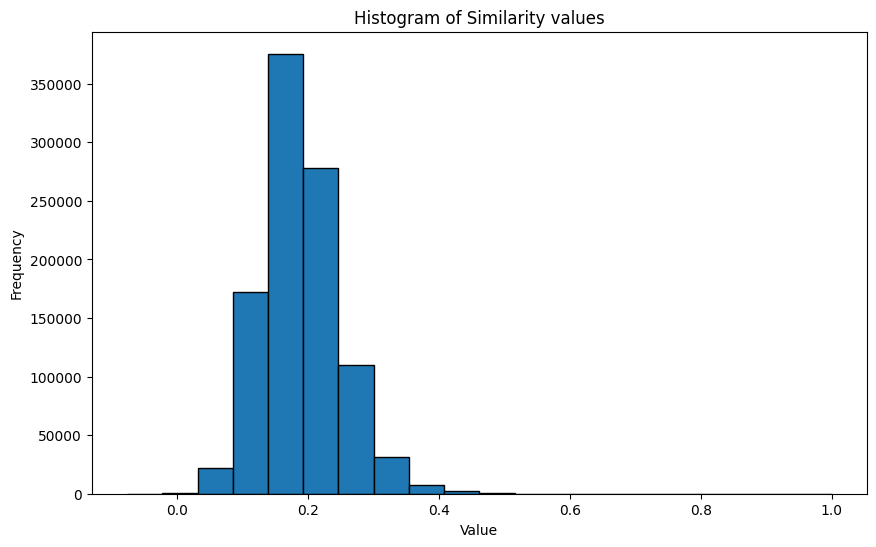

In [10]:
# Lets plot the distances of all the other words against the word "college"
import matplotlib.pyplot as plt

# Extract values from the dictionary
values = list(similarity_vals.values())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, edgecolor='black')

# Adding title and labels
plt.title('Histogram of Similarity values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [11]:
# sort the values to get the top 10
# Read https://docs.python.org/3/howto/sorting.html
top_10_similar_words = sorted(similarity_vals.items(), key=lambda item: item[1], reverse=True)[:10]

# Print the top 10 similar words and their similarity scores
for word, similarity in top_10_similar_words:
    print(f"Word: {word}, Similarity: {similarity}")

Word: college, Similarity: 1.0
Word: university, Similarity: 0.7941901894056824
Word: colleges, Similarity: 0.7461447526359718
Word: College, Similarity: 0.7121434169638946
Word: school, Similarity: 0.7050682332798615
Word: campus, Similarity: 0.7024628844506265
Word: collegiate, Similarity: 0.6864985865943902
Word: student, Similarity: 0.6444006026771875
Word: seminary, Similarity: 0.6437642273724472
Word: undergraduate, Similarity: 0.6233375665267828


# Lets build visualizations between a word and its similar words

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from numpy.linalg import norm

# Function to calculate the top k similar words
def find_top_similar_words(query_word, word_vectors, top_k = 50):
    similarity_vals = dict()
    query_vec = word_vectors[query_word]
    
    # Calculate cosine similarity between query word and all other words
    for word, vector in word_vectors.items():
        similarity_vals[word] = np.dot(query_vec, vector) / (norm(query_vec) * norm(vector))
    
    # Sort words by similarity value and get the top_k words
    # This part of the function can be stored outside so that you can chooes to extract
    # as many top_k words as you desire.
    sorted_words = sorted(similarity_vals.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[1:(top_k+1)]  # Exclude the query word itself

In [13]:
# As you can see finding similar words via the brute force approach is slow.
query_word = "boat"
similar_words_boat = find_top_similar_words(query_word, word_vectors, 500)

In [15]:
# Constract an array of the query_word and its similar words.

word = query_word

# Initialize an empty array to hold word vectors
# 300 is the size of the embedding vectors we are working with
arrays = np.empty((0, 300), dtype='f')
    
# Lists to hold the words and their colors for the plot
word_labels = [word]
color_list = ['red']  # Query word will be red
    
# Add the vector for the query word
arrays = np.append(arrays, [word_vectors[word]], axis=0)
    
# Add vectors for the most similar words to the array
for wrd in similar_words_boat[:100]:
    wrd_vector = word_vectors[wrd[0]]
    word_labels.append(wrd[0])
    color_list.append('blue')  # Similar words will be blue
    arrays = np.append(arrays, [wrd_vector], axis=0)

In [16]:
arrays.shape

(101, 300)

In [18]:
# Reduce the dimensionality of word vectors from 300 to 50 dimensions using PCA
reduc = PCA(n_components=50).fit_transform(arrays)

In [19]:
# Use t-SNE to reduce the dimensionality further to 2 dimensions for visualization
np.set_printoptions(suppress=True)  # Suppress scientific notation for clarity
#Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
Y = TSNE(n_components=2, random_state=0, perplexity=5, learning_rate=200).fit_transform(reduc)

# Prepare data for plotting
df = pd.DataFrame({
        'x': [x for x in Y[:, 0]],
        'y': [y for y in Y[:, 1]],
        'words': word_labels,
        'color': color_list
})

In [20]:
df_sample = df.head(10)

In [21]:
df_sample

,x,y,words,color
0,102.038864,57.900879,boat,red
1,119.464310,54.965286,boats,blue
2,161.269806,74.524475,Boat,blue
3,216.474976,38.725155,yacht,blue
4,-117.405861,-260.348694,canoe,blue
5,-114.384010,226.987625,sailboat,blue
6,77.497787,39.029469,dinghy,blue
7,33.838478,125.203407,ship,blue
8,125.256699,-26.595379,vessel,blue
9,250.040100,-150.248154,kayak,blue


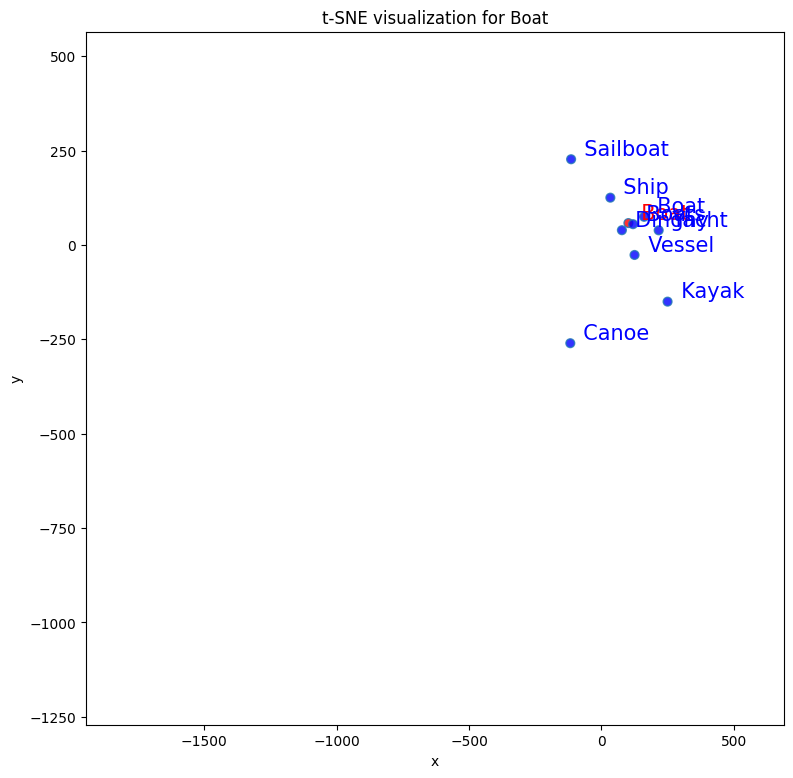

In [22]:
# Set up the plot
fig, _ = plt.subplots()
fig.set_size_inches(9, 9)
    
# Create the scatter plot
p1 = sns.regplot(data=df_sample,
                 x="x",
                 y="y",
                 fit_reg=False,  # Don't fit a regression line
                 marker="o",
                 scatter_kws={'s': 40, 'facecolors': df_sample['color']})

# Add labels to each point in the plot
for line in range(0, df_sample.shape[0]):
    p1.text(df_sample["x"][line],
            df_sample['y'][line],
            '  ' + df["words"][line].title(),
            horizontalalignment='left',
            verticalalignment='bottom', 
            size='medium',
            color=df_sample['color'][line],
            weight='normal').set_size(15)

# Set the limits for x and y axes
plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

# Add a title to the plot
plt.title('t-SNE visualization for {}'.format(word.title()))

# Show the plot
plt.show()

# Using Annoy to create a vector index to enable fast vector search

In [23]:
!pip install annoy

In [27]:
# https://github.com/spotify/annoy
    
    
from annoy import AnnoyIndex

f = 300  # Length of vector that will be indexed
t = AnnoyIndex(f, 'angular')

# Annoy stores each vector against a integer key
# we create index_to_word to store the index values against the word
index_to_word = dict()

# Initialize the index_val to 0
index_val = 0

# Iterate through our word_vectors dict that contains each word as the dictionary key
# and the fasttext embedding vector as the dictionary value
for word, vector in word_vectors.items():    
    t.add_item(index_val, vector)
    index_to_word[index_val] = word
    index_val = index_val + 1

t.build(50) # 50 trees
t.save('word_embeddings.ann')

True

In [32]:
# Read the Annoy index stored earlier
u = AnnoyIndex(f, 'angular')
u.load('/kaggle/working/word_embeddings.ann') # super fast, will just mmap the file


True

In [33]:
query_word = "statistics"
n = 10
v = word_vectors[query_word]
res_inds = u.get_nns_by_vector(v, n, search_k=-1, include_distances=True)
item_indexes, distances = res_inds

In [34]:
print("Words similar to query_word: ", query_word)
print("----------")
for i in range(len(item_indexes)):
    idx = item_indexes[i]
    print("word: ", index_to_word[idx], " is at a distance of: ", distances[i], " or similarity of: ", 1-distances[i])

Words similar to query_word:  statistics
----------
word:  statistics  is at a distance of:  0.0  or similarity of:  1.0
word:  stats  is at a distance of:  0.637666642665863  or similarity of:  0.36233335733413696
word:  data  is at a distance of:  0.8113470673561096  or similarity of:  0.18865293264389038
word:  stat  is at a distance of:  0.854632556438446  or similarity of:  0.14536744356155396
word:  figures  is at a distance of:  0.8640503287315369  or similarity of:  0.13594967126846313
word:  percentages  is at a distance of:  0.8983590006828308  or similarity of:  0.10164099931716919
word:  numbers  is at a distance of:  0.9014903903007507  or similarity of:  0.09850960969924927
word:  totals  is at a distance of:  0.9024370908737183  or similarity of:  0.09756290912628174
word:  demographics  is at a distance of:  0.9026355743408203  or similarity of:  0.09736442565917969
word:  averages  is at a distance of:  0.9271734356880188  or similarity of:  0.0728265643119812
